In [1]:
import pandas as pd

df = pd.read_csv("data/mushrooms.csv")

# Spalten (axis=1) vorab aus den Daten entfernen
# df = df.drop("Spaltenname", axis = 1)
# Wenn man auf class trainiert, dann kommen Fehler, weil der Entscheidungsbaumgenerator 
# in sklearn mit Zahlen arbeiten möchte. Daher braucht man One-Hot-Encoding: 

# One-Hot-Encoding
df = pd.get_dummies(df)

df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [2]:
# Eine Splate aus class_e / class_p reicht aus. Also:

df = df.drop("class_e", axis = 1)

df.head()

,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("class_p", axis = 1).values
y = df["class_p"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
#model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

1.0


In [5]:
#Alle Spaltennamen des Modells:
df.drop("class_p", axis = 1).columns.values

array(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y',
       'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c',
       'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b',
       'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r',
       'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e',
       'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k

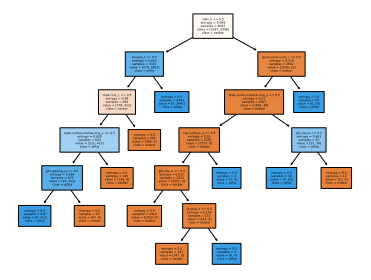

In [6]:
%matplotlib inline
%config InlineBackend.figure_formats = set(["svg"])
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#Variable fig für Dateiexport nötig
fig = plt.figure(dpi=80)
plot_tree(model, 
          fontsize=3, 
          feature_names = df.drop("class_p", axis = 1).columns.values, 
          class_names = ["essbar", "giftig"], 
          filled = True
         )
plt.show()